In [21]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp


In [22]:
R = 8314 # mJ/(K mol)
T = 273.0+37.0 #  K
F = 96485.33289 # C/mol

K_o = 5.4;   #mM # try changing the K_o, check the effect on the solution
K_i = 145.0; #mM
E_K = (R*T/F)*log(K_o/K_i) # mV
g_K = 0.1; # how does the conductace affect the solution?

print(E_K)

-87.89223409078865


In [23]:
# Simple Potassium current
def i_K(V):

    i_K = g_K*(V-E_K);
    return i_K;


#ODE for the membrane potential
def rhs(y,t):
    
    V = y;

    C_m = 1.0; # uF/cm^2


    i_ion = i_K(V);


    dV = -(1/C_m)*(i_ion);

    return dV;



In [24]:
V0 = -85; # inital condition for the membrane
Y0 = [V0];
time = np.linspace(0,50,10001);
Y = odeint(rhs, Y0, time)


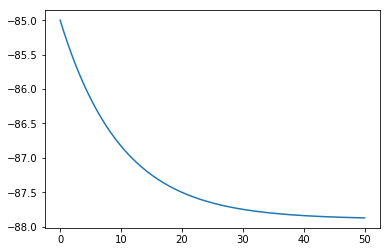

In [25]:
plt.plot(time,Y);
plt.show()


In [26]:
# adding an applied current to the model
def rhs(y, t, i_app):
    
    V = y;

    C_m = 1.0; # uF/cm^2

    # only applied in the first millisecond:
    if t>1:
        i_app = 0;


    #i_ion = i_K;
    i_ion = i_K(V);


    dV = -(1/C_m)*(i_ion + i_app);

    return dV;



In [27]:
time = np.linspace(0,50,10001);
i_app = -30;  # try chaning the size and sign 
P = (i_app,)


In [28]:
Y = odeint(rhs, Y0, time, P)


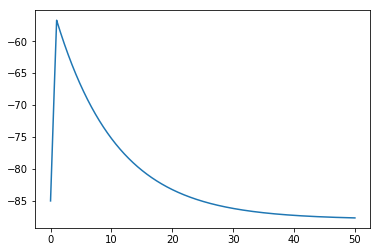

In [29]:
plt.plot(time,Y); plt.show()

In [30]:
Na_o = 140.0
Na_i = 18.0;
E_Na = (R*T/F)*log(Na_o/Na_i) # mV
g_Na = 0.1;


In [31]:
# A simple Sodiun channel
def i_Na(V):

    i_Na = g_Na*(V-E_Na);
    return i_Na;


In [32]:
# Add the sodium channel to the ODE:
def rhs(y, t, i_app):
    
    V = y;

    C_m = 1.0; # uF/cm^2

    if t>1:
        i_app = 0;

    i_ion = i_K(V) + i_Na(V);
    
    dV = -(1/C_m)*(i_ion + i_app);

    return dV;



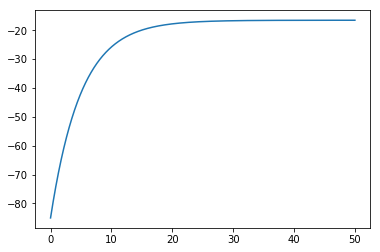

In [33]:
i_app = -0*30;
P = (i_app,)
Y = odeint(rhs, [-85], time, P)
plt.plot(time,Y); plt.show()



In [18]:
# The equilibrium potential for the cell as a whole:
V_eq = (g_Na*E_Na + g_K*E_K)/(g_Na + g_K)
# The membrane potential at the end of the computation:
V_end = Y[-1,0]
print(E_K, E_Na, V_eq,V_end)


-87.89223409078865 54.794047723492945 -16.54909318364785 -16.5522008381
